# Serie 13

## Vorlesung

In [14]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
AirP = pd.read_csv("AirPassengers.csv") 
AirP.head()

,TravelDate,Passengers
0,1/1/1949,112
1,2/1/1949,118
2,3/1/1949,132
3,4/1/1949,129
4,5/1/1949,121


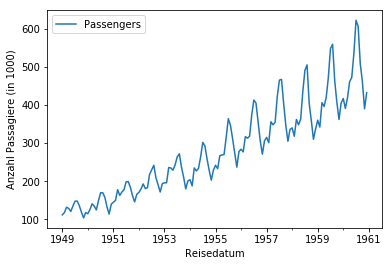

In [15]:
AirP["TravelDate"] = pd.DatetimeIndex(AirP["TravelDate"]) 
AirP.set_index("TravelDate", inplace=True)
AirP.head()
AirP.plot()
plt.xlabel("Reisedatum") 
plt.ylabel("Anzahl Passagiere (in 1000)")
plt.show()

Folie 20/59:

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
AusBeer = pd.read_csv("AustralianBeer.csv",sep=";",header=0)
AusBeer = AusBeer.rename(columns={AusBeer.columns[1]: "megalitres"})
AusBeer1 = AusBeer.copy() 
AusBeer1.head()

,Quarter,megalitres
0,1956Q1,284.4
1,1956Q2,212.8
2,1956Q3,226.9
3,1956Q4,308.4
4,1957Q1,262.0


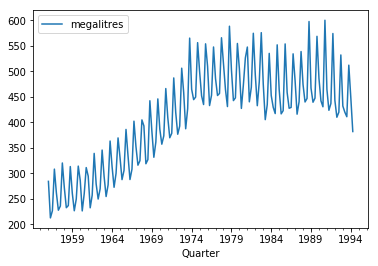

In [32]:
AusBeer1["Quarter"] = pd.DatetimeIndex(AusBeer["Quarter"]) 
AusBeer1.set_index("Quarter", inplace=True)
AusBeer1.head() 
AusBeer1.plot()

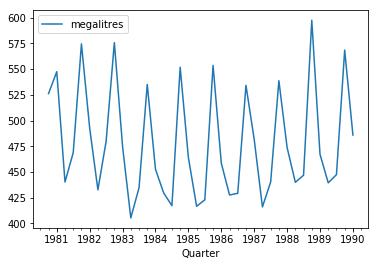

In [33]:
AusBeer1.loc["1980-9":"1990-3",:].plot()

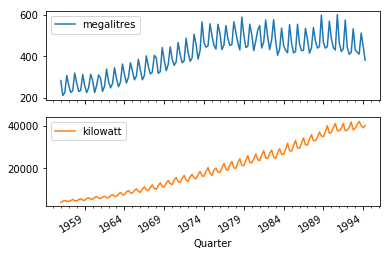

In [40]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
AusBeer = pd.read_csv("AustralianBeer.csv",sep=";",header=0) 
AusBeer = AusBeer.rename(columns={AusBeer.columns[1]: "megalitres"})
AusEl = pd.read_csv("AustralianElectricity.csv",sep=";")
AusEl = AusEl.rename(columns={AusEl.columns[1]: "kilowatt"})
Aussie = AusBeer.copy()

# Hier wird der Datensatz um eine Spalte erweitert
Aussie["kilowatt"] = AusEl["kilowatt"] 
Aussie["Quarter"] = pd.DatetimeIndex(Aussie["Quarter"])
Aussie.set_index("Quarter", inplace=True) 
Aussie.plot(subplots=True)
plt.show()

In [43]:
Aussie.describe()

,megalitres,kilowatt
count,154.000000,154.000000
mean,408.267532,20071.519481
std,97.598588,11687.235582
min,212.800000,3923.000000
25%,325.425000,9492.500000
50%,427.450000,18513.500000
75%,466.950000,29228.000000
max,600.000000,42198.000000


In [44]:
AusEl.describe()

,kilowatt
count,155.000000
mean,20218.509677
std,11792.093377
min,3923.000000
25%,9496.000000
50%,18515.000000
75%,29404.000000
max,42855.000000


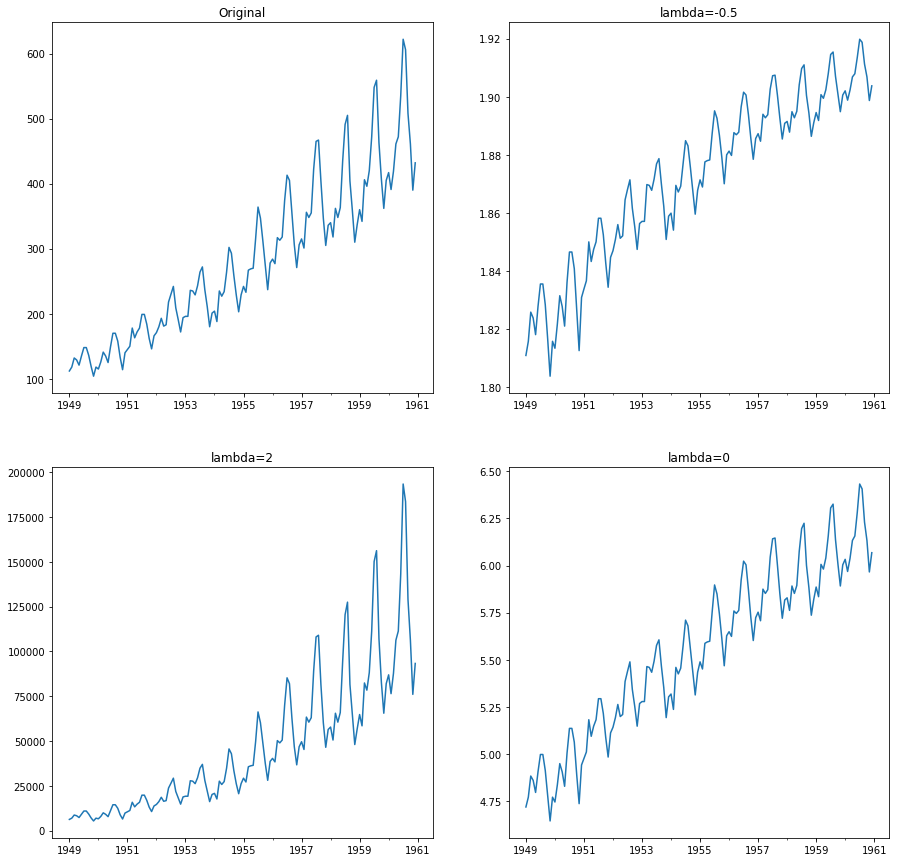

In [52]:
def boxcox(x,lambd):
    return np.log(x) if (lambd==0) else (x**lambd-1)/lambd

AirP["l_2"] = boxcox(AirP["Passengers"],2) 
AirP["l_0"] = boxcox(AirP["Passengers"],0) 
AirP["l_-05"] = boxcox(AirP["Passengers"],-.5)

plt.subplots(2, 2, figsize=(15, 15))

plt.subplot(221)
AirP["Passengers"].plot() 
plt.title("Original") 
plt.xlabel("")

plt.subplot(222) 
AirP["l_-05"].plot() 
plt.title("lambda=-0.5") 
plt.xlabel("")

plt.subplot(223) 
AirP["l_2"].plot() 
plt.title("lambda=2") 
plt.xlabel("")

plt.subplot(224) 
AirP["l_0"].plot() 
plt.title("lambda=0") 
plt.xlabel("")
plt.show()

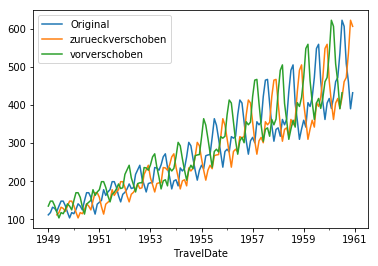

In [54]:
AirP["s_4"] = AirP["Passengers"].shift(4)
AirP["s_-5"] = AirP["Passengers"].shift(-5)
AirP["Passengers"].plot()
AirP["s_4"].plot()
AirP["s_-5"].plot() 
plt.legend(["Original","zurueckverschoben","vorverschoben"])
plt.show()

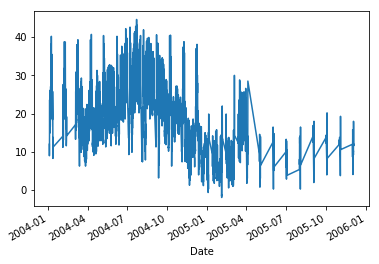

In [62]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

AirQ = pd.read_csv("AirQualityUCI.csv", sep=";", decimal=",")
AirQ1 = AirQ.copy()

# pandas kennt das Zeitformat in der Tabelle nicht: 
# Punkt muss durch . ersetzt werden
AirQ1["Time"] = AirQ1["Time"].str.replace(".","-")

AirQ1["Date"] = pd.DatetimeIndex(AirQ1["Date"]+" "+AirQ1["Time"]) 
AirQ1.set_index("Date", inplace=True)

# Einige Wert der Temperatur sind -200. Diese Zeilen werden weggelassen
AirQ1 = AirQ1[AirQ1["T"] > -20]

AirQ1["T"].plot()
plt.show()

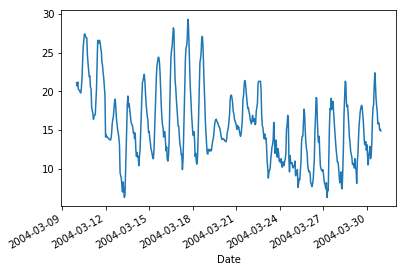

In [64]:
AirQ4 = AirQ1.loc["2004-3-10":"2004-3-30","T"]
AirQ4.plot()

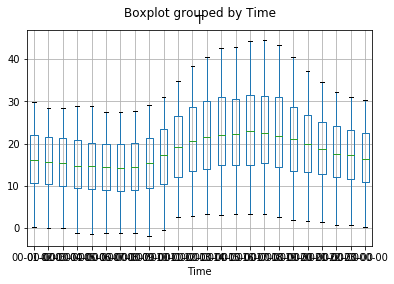

In [65]:
AirQ1.boxplot("T",by="Time") 
plt.show()

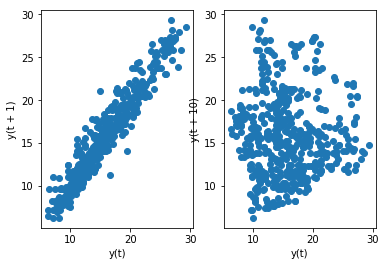

In [68]:
from pandas.plotting import lag_plot 

plt.subplot(121)
lag_plot(AirQ4) 

plt.subplot(122)
lag_plot(AirQ4, 10) 

plt.show()

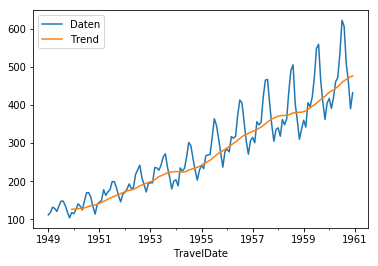

In [79]:
AirP["Trend"] = AirP["Passengers"].rolling(window=12).mean() 
AirP["Passengers"].plot()
AirP["Trend"].plot() 
plt.legend(["Daten","Trend"]) 
plt.show()

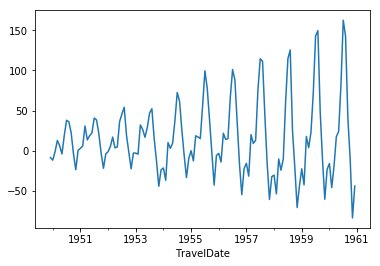

In [81]:
AirP["Season"] = AirP["Passengers"]-AirP["Trend"]
AirP["Season"].plot() 
plt.show()

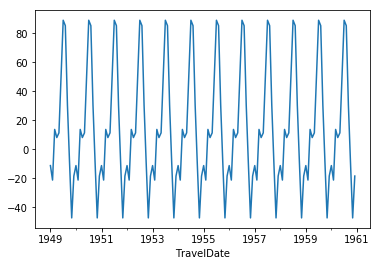

In [82]:
# AirP[’Season’] wird in eine Matrix umgewandelt 
# mit den Monaten als Spalten (Jahre als Zeilen)
AirP2 = AirP["Season"].values.reshape((12,12))

# Entlang der Spalten (axis=0) wird der Mittelwert genommen
# nanmean bedeutet, die NaN werden ignoriert
ave = np.nanmean(AirP2,axis=0)

# Der Vektor ave wird verzwölfacht,
# damit er wieder die gleiche Länge hat, wie AirP[’Season’]
AirP["Season_ave"] = np.tile(A=ave, reps=12) 
AirP["Season_ave"].plot()
plt.show()

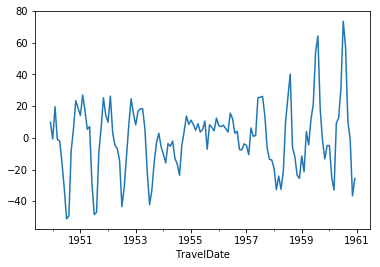

In [83]:
AirP["Residual"] = AirP["Season"] - AirP["Season_ave"] 
AirP["Residual"].plot()
plt.show()

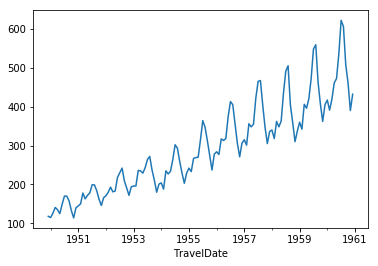

In [85]:
AirP["Test"] = AirP["Residual"] + AirP["Season_ave"] + AirP["Trend"]
AirP["Test"].plot()
plt.show()

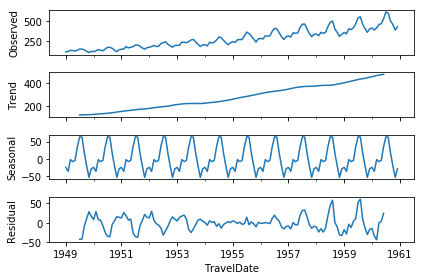

In [88]:
from statsmodels.tsa.seasonal import seasonal_decompose 

seasonal_decompose(AirP["Passengers"], model="additive", freq=12).plot() 
plt.show()

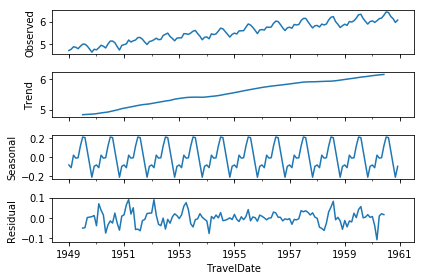

In [91]:
seasonal_decompose(np.log(AirP["Passengers"]), model="additive", freq=12).plot() 
plt.show()